In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
import os

In [2]:
train_path = '../data/facial/training.csv'
test_path = '../data/facial/test.csv'
lookid_path = '../data/facial/IdLookupTable.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
lookid_data = pd.read_csv(lookid_path)

In [3]:
train_data.head(1).T

,0
left_eye_center_x,66.0336
left_eye_center_y,39.0023
right_eye_center_x,30.227
right_eye_center_y,36.4217
left_eye_inner_corner_x,59.5821
left_eye_inner_corner_y,39.6474
left_eye_outer_corner_x,73.1303
left_eye_outer_corner_y,39.97
right_eye_inner_corner_x,36.3566
right_eye_inner_corner_y,37.3894


### nan 카테고리로 보기
- any() : 하나라도 True면 True
    - axis defalut는 0
- value_counts() : 시리즈의 값이 카테고리 값인 경우 각각의 값이 나온 횟수를 셀 수 있음

In [4]:
train_data.isnull().any(axis=0).value_counts()

True     28
False     3
dtype: int64

In [5]:
for column in train_data.columns:
    print("column : {}".format(column))
    print("isnull : {}".format(train_data[column].isnull().sum()))

column : left_eye_center_x
isnull : 10
column : left_eye_center_y
isnull : 10
column : right_eye_center_x
isnull : 13
column : right_eye_center_y
isnull : 13
column : left_eye_inner_corner_x
isnull : 4778
column : left_eye_inner_corner_y
isnull : 4778
column : left_eye_outer_corner_x
isnull : 4782
column : left_eye_outer_corner_y
isnull : 4782
column : right_eye_inner_corner_x
isnull : 4781
column : right_eye_inner_corner_y
isnull : 4781
column : right_eye_outer_corner_x
isnull : 4781
column : right_eye_outer_corner_y
isnull : 4781
column : left_eyebrow_inner_end_x
isnull : 4779
column : left_eyebrow_inner_end_y
isnull : 4779
column : left_eyebrow_outer_end_x
isnull : 4824
column : left_eyebrow_outer_end_y
isnull : 4824
column : right_eyebrow_inner_end_x
isnull : 4779
column : right_eyebrow_inner_end_y
isnull : 4779
column : right_eyebrow_outer_end_x
isnull : 4813
column : right_eyebrow_outer_end_y
isnull : 4813
column : nose_tip_x
isnull : 0
column : nose_tip_y
isnull : 0
column : mou

In [6]:
train_data.loc[train_data['mouth_left_corner_x'].isnull(),'mouth_left_corner_x']

1620   NaN
1731   NaN
1737   NaN
1747   NaN
1779   NaN
1877   NaN
1881   NaN
1920   NaN
1925   NaN
1979   NaN
2127   NaN
2148   NaN
2154   NaN
2175   NaN
2178   NaN
2284   NaN
2285   NaN
2286   NaN
2287   NaN
2288   NaN
2289   NaN
2290   NaN
2291   NaN
2292   NaN
2293   NaN
2294   NaN
2295   NaN
2296   NaN
2297   NaN
2298   NaN
        ..
7019   NaN
7020   NaN
7021   NaN
7022   NaN
7023   NaN
7024   NaN
7025   NaN
7026   NaN
7027   NaN
7028   NaN
7029   NaN
7030   NaN
7031   NaN
7032   NaN
7033   NaN
7034   NaN
7035   NaN
7036   NaN
7037   NaN
7038   NaN
7039   NaN
7040   NaN
7041   NaN
7042   NaN
7043   NaN
7044   NaN
7045   NaN
7046   NaN
7047   NaN
7048   NaN
Name: mouth_left_corner_x, Length: 4780, dtype: float64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
### 결측 값 채우기
- fill.na(method = 'ffill)
    - nan값 위의 값들로 채움


In [7]:
train_fdata = train_data.fillna(method = 'ffill', inplace = False)

In [8]:
train_fdata.isnull().any().value_counts()

False    31
dtype: int64

In [9]:
str_test = '134 144 57 '
str_test.split(' ')

['134', '144', '57', '']

### 결측 값 그냥 다 지우기

In [4]:
train_rdata = train_data.dropna(inplace=False)
# dropna하면서 날라가는 행이 있기때문에 index 초기화 필요
# train_rdata의 valuess로 dataframe 재 생성
train_rdata = pd.DataFrame(train_rdata.values,columns = train_data.columns)

In [5]:
imag = []

for i in range(0, train_rdata.shape[0]):
    img = train_rdata['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [6]:
print("len(imag) : {}\nlen(imag[0]): {}".format(len(imag), len(imag[0])))

len(imag) : 2140
len(imag[0]): 9216


### str타입의 img를 96x96의 이미지로 저장
- 여백으로 구분되어있는 픽셀값들을 slit함수 통해 분리해
- 리스트 형태로 저장

In [7]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1, 96,96)

X_train.shape : (2140, 96, 96)


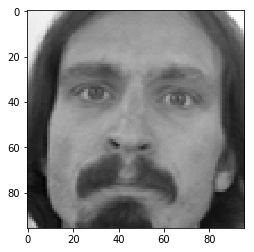

In [8]:
print("X_train.shape : {}".format(X_train.shape))
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [9]:
training = train_rdata.drop('Image', axis =1)
y_train = []
for i in range(0,train_rdata.shape[0]):
    y = training.iloc[i,:]
    y_train.append(y)
y_train = np.array(y_train, dtype = 'float')
    

In [10]:
print("y_train.shape : {}".format(y_train.shape))

y_train.shape : (2140, 30)


### normalization images

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_norm = X_train.reshape([2140, 96*96])

x_train_norm = scaler.fit_transform(x_train_norm)
#y_train_norm = scaler.fit_transform(y_train)
print("x_train_norm.shape : {}".format(x_train_norm.shape))
#print("y_train_norm.shape : {}".format(y_train_norm.shape))

x_train_norm.shape : (2140, 9216)


__batch_normalization__  
https://de-novo.org/2018/05/28/batch-normalization-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0/  
http://openresearch.ai/t/topic/80

__model 요약__
- 5개의 (conv2d(3x3filter) + batch_norm + pooling(2x2) + dropout )
- 2개의 desnse layer(128 units, 30 units)

In [147]:
import tensorflow as tf
import math

class CNNModel:
    def __init__(self, sess, name):
        self.name = name
        self.sess = sess
    
    def create_network(self):
        with tf.variable_scope(self.name):
            self.X = tf.placeholder(shape = [None, 96*96], dtype = tf.float32)
            self.Y = tf.placeholder(shape = [None, 30], dtype = tf.float32)
            self.keep_rate = tf.placeholder(dtype = tf.float32)
            self.phase = tf.placeholder(dtype = tf.bool)
            
            X_img = tf.reshape(self.X, shape = [-1, 96, 96, 1])
            
            L1 = tf.layers.conv2d(inputs = X_img, filters = 16, kernel_size =[3,3],
                            padding = "SAME", strides = 1,activation = tf.nn.relu)
            L1 = tf.contrib.layers.batch_norm(L1, center = True, scale = True, is_training=self.phase)
            L1 = tf.layers.max_pooling2d(inputs = L1, pool_size = [2,2], padding ="SAME", strides = 2)
            L1 = tf.layers.dropout(inputs=L1, rate =self.keep_rate)
            
            # 48 48 1 16
            L2 = tf.layers.conv2d(inputs = L1, filters = 32, kernel_size =[3,3],
                            padding = "SAME", strides = 1,activation = tf.nn.relu)
            L2 = tf.contrib.layers.batch_norm(L2, center = True, scale = True, is_training=self.phase)
            L2 = tf.layers.max_pooling2d(inputs = L2, pool_size = [2,2], padding ="SAME", strides = 2)
            L2 = tf.layers.dropout(inputs=L2, rate =self.keep_rate)
            
            # 24 24 16 32
            L3 = tf.layers.conv2d(inputs = L2, filters = 32, kernel_size =[3,3],
                            padding = "SAME", strides = 1,activation = tf.nn.relu)
            L3 = tf.contrib.layers.batch_norm(L3, center = True, scale = True, is_training=self.phase)
            L3 = tf.layers.max_pooling2d(inputs = L3, pool_size = [2,2], padding ="SAME", strides = 2)
            L3 = tf.layers.dropout(inputs=L3, rate =self.keep_rate)
            # 12 12 32 32
            
            L4 = tf.layers.conv2d(inputs = L3, filters = 64, kernel_size =[3,3],
                            padding = "SAME", strides = 1,activation = tf.nn.relu)
            L4 = tf.contrib.layers.batch_norm(L4, center = True, scale = True, is_training=self.phase)
            L4 = tf.layers.max_pooling2d(inputs = L4, pool_size = [2,2], padding ="SAME", strides = 2)
            L4 = tf.layers.dropout(inputs=L4, rate =self.keep_rate)
            # 6 6 32 64
            
            L5 = tf.layers.conv2d(inputs = L4, filters = 128, kernel_size =[3,3],
                            padding = "SAME", strides = 1,activation = tf.nn.relu)
            L5 = tf.contrib.layers.batch_norm(L5, center = True, scale = True, is_training=self.phase)
            L5 = tf.layers.max_pooling2d(inputs = L5, pool_size = [2,2], padding ="SAME", strides = 2)
            L5 = tf.layers.dropout(inputs=L5, rate =self.keep_rate)
            print("L5layer.shape : {}".format(L5.shape))
            
            # 3 3 64 128
            L5 = tf.reshape(L5, shape=[-1,3*3*128])
            
            print("L5.shape : {}".format(L5.shape))
            
            dense1 = tf.layers.dense(inputs = L5, units = 128, activation= tf.nn.relu)
        
            print("dense1.shape : {}".format(dense1.shape))
            self.H = tf.layers.dense(inputs=dense1, units = 30)
            print("H.shape : {}".format(self.H.shape))
            
            #self.cost = tf.losses.softmax_cross_entropy(self.Y, self.H)
            #self.cost =  -tf.reduce_sum(self.H*tf.log(self.Y))
            #self.cost = tf.nn.sigmoid_cross_entropy_with_logits(labels=self.Y,logits= self.H)
            #self.cost = tf.nn.softmax_cross_entropy_with_logits_v2(labels = self.Y,logits= self.H)
            self.cost = tf.losses.mean_squared_error(labels = self.Y, predictions=self.H)
            optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)
            self.train = optimizer.minimize(self.cost)
            
            self.sess.run(tf.global_variables_initializer())
            
    def batch_train(self, epoch_size, batch_size, features, label):
        iter_of_num = int(features.shape[0] / batch_size)
        for ep in range(epoch_size):
            batch_start = 0
            print("ep : {}".format(ep+1))
            for i in range(iter_of_num):
                batch_end = batch_start + batch_size
                if i == iter_of_num-1:
                    x_batch = features[batch_start:][:]
                    y_batch = label[batch_start:][:]
                    _, self.cost_val = self.sess.run([self.train, self.cost], feed_dict = {self.X:x_batch, self.Y:y_batch, self.keep_rate:0.5, self.phase:True})
                else:
                    x_batch = features[batch_start:batch_end-1][:]
                    y_batch = label[batch_start:batch_end-1][:]
                    _, self.cost_val = self.sess.run([self.train, self.cost], feed_dict={self.X:x_batch, self.Y:y_batch, self.keep_rate:0.5, self.phase:True})
                    batch_start = batch_end
                if i % 20 == 0:
                    print("cost_val : {}".format(self.cost_val))
                    
    def batch_test(self, batch_size, features):
        iter_of_num = int(features.shape[0] / batch_size)
        if iter_of_num == 0:
            iter_of_num = feautres.shape[0]
        batch_start = 0
        output = []
        for i in range(iter_of_num):
            batch_end = batch_start + batch_size
            if i == iter_of_num - 1:
                x_batch = features[batch_start:][:]
                batch_output = self.sess.run([self.H], feed_dict = {self.X:x_batch, self.keep_rate:1.0, self.phase:False})
            else:
                x_batch = features[batch_start:batch_end-1][:]
                batch_output = self.sess.run([self.H], feed_dict = {self.X:x_batch, self.keep_rate:1.0, self.phase:False})
            print(batch_output)
            output.append(batch_output)
        return output
            

In [191]:
op = cnn_model.batch_test(1, X_train[1:2].reshape(-1,96*96))

[array([[39.26708 , 25.19858 , 24.343872, 22.90231 , 36.624016, 21.161564,
        47.755592, 25.083977, 27.18768 , 26.458757, 17.0808  , 21.609533,
        32.16008 , 20.570137, 49.15924 , 19.841295, 26.54587 , 19.263334,
        14.76952 , 19.367142, 26.97994 , 38.20534 , 42.942276, 45.54224 ,
        22.225271, 45.021214, 29.864475, 46.90788 , 30.134123, 48.174248]],
      dtype=float32)]


In [165]:
y_train[1]

array([64.33293617, 34.9700766 , 29.9492766 , 33.44871489, 58.85617021,
       35.27434894, 70.7227234 , 36.18716596, 36.0347234 , 34.36153191,
       24.47251064, 33.14444255, 53.98740426, 28.27594894, 78.63421277,
       30.4059234 , 42.72885106, 26.14604255, 16.8653617 , 27.05885957,
       48.20629787, 55.66093617, 56.42144681, 76.352     , 35.12238298,
       76.04765957, 46.68459574, 70.26655319, 45.46791489, 85.48017021])

In [193]:
cnn_model.batch_train(50, 10, x_train_norm, y_train)

ep : 1
cost_val : 2.6271514892578125
cost_val : 0.9394579529762268
cost_val : 2.4452314376831055
cost_val : 0.748816192150116
cost_val : 0.7228638529777527
cost_val : 1.3718687295913696
cost_val : 1.018596887588501
cost_val : 1.0119860172271729
cost_val : 1.312561273574829
cost_val : 2.585029125213623
cost_val : 2.2115185260772705
ep : 2
cost_val : 3.554759979248047
cost_val : 1.098156452178955
cost_val : 3.079648971557617
cost_val : 0.9067309498786926
cost_val : 0.6951536536216736
cost_val : 1.1616532802581787
cost_val : 1.012315034866333
cost_val : 1.1032567024230957
cost_val : 1.098920464515686
cost_val : 2.470686674118042
cost_val : 3.272566556930542
ep : 3
cost_val : 4.987454414367676
cost_val : 1.409510612487793
cost_val : 2.745375394821167
cost_val : 1.2237051725387573
cost_val : 0.8268896341323853
cost_val : 1.0034875869750977
cost_val : 1.0993728637695312
cost_val : 1.3681234121322632
cost_val : 1.076692819595337
cost_val : 2.238912582397461
cost_val : 4.238191604614258
ep : 4

cost_val : 0.6915038824081421
cost_val : 1.3455981016159058
cost_val : 1.084854245185852
cost_val : 1.615608811378479
cost_val : 1.8408230543136597
ep : 26
cost_val : 1.1037654876708984
cost_val : 0.9959602355957031
cost_val : 1.3090405464172363
cost_val : 1.1247186660766602
cost_val : 1.0097572803497314
cost_val : 0.8139509558677673
cost_val : 0.6092870235443115
cost_val : 1.5806831121444702
cost_val : 1.2167991399765015
cost_val : 1.598861813545227
cost_val : 1.4358857870101929
ep : 27
cost_val : 1.5112119913101196
cost_val : 1.1528270244598389
cost_val : 1.1480358839035034
cost_val : 1.9043899774551392
cost_val : 0.9539667367935181
cost_val : 0.8671647310256958
cost_val : 0.7014872431755066
cost_val : 1.6668713092803955
cost_val : 1.4732307195663452
cost_val : 1.3646339178085327
cost_val : 1.427037239074707
ep : 28
cost_val : 1.981734037399292
cost_val : 1.0869759321212769
cost_val : 1.4076417684555054
cost_val : 2.233555555343628
cost_val : 1.2030582427978516
cost_val : 0.994549334

ep : 50
cost_val : 1.3823493719100952
cost_val : 1.2124855518341064
cost_val : 0.8911821842193604
cost_val : 1.3203961849212646
cost_val : 0.764019787311554
cost_val : 0.8874565362930298
cost_val : 0.5292752385139465
cost_val : 1.0691654682159424
cost_val : 0.9047158360481262
cost_val : 2.1018435955047607
cost_val : 1.7494733333587646


In [184]:
tf.reset_default_graph()
cnn_model = CNNModel(tf.Session(), "cnn_1")
cnn_model.create_network()
print("cnn_1 training ...")
cnn_model.batch_train(50, 10, x_train_norm, y_train)

L5layer.shape : (?, 3, 3, 128)
L5.shape : (?, 1152)
dense1.shape : (?, 128)
H.shape : (?, 30)
cnn_1 training ...
ep : 1
cost_val : 2587.97998046875
cost_val : 2294.913330078125
cost_val : 1959.160400390625
cost_val : 1549.904296875
cost_val : 1061.4456787109375
cost_val : 619.814453125
cost_val : 423.4393005371094
cost_val : 181.37496948242188
cost_val : 163.38943481445312
cost_val : 99.27696990966797
cost_val : 34.132545471191406
ep : 2
cost_val : 41.03432083129883
cost_val : 39.61369705200195
cost_val : 17.687570571899414
cost_val : 20.020132064819336
cost_val : 12.99431324005127
cost_val : 10.996814727783203
cost_val : 16.829160690307617
cost_val : 8.33396053314209
cost_val : 23.548625946044922
cost_val : 24.8997802734375
cost_val : 18.60601806640625
ep : 3
cost_val : 15.815834999084473
cost_val : 16.706361770629883
cost_val : 12.956021308898926
cost_val : 13.506803512573242
cost_val : 9.341238975524902
cost_val : 8.40886116027832
cost_val : 12.820938110351562
cost_val : 6.744707107

cost_val : 2.244772434234619
cost_val : 1.6072132587432861
cost_val : 2.748941659927368
cost_val : 3.6551196575164795
cost_val : 4.54786491394043
ep : 26
cost_val : 3.053420305252075
cost_val : 2.54707670211792
cost_val : 2.2020905017852783
cost_val : 1.3165998458862305
cost_val : 1.1225872039794922
cost_val : 1.3089110851287842
cost_val : 2.1465275287628174
cost_val : 1.6412025690078735
cost_val : 2.445155143737793
cost_val : 3.1710281372070312
cost_val : 4.076138019561768
ep : 27
cost_val : 2.2989749908447266
cost_val : 3.0167365074157715
cost_val : 3.4390697479248047
cost_val : 1.329178810119629
cost_val : 1.0183912515640259
cost_val : 1.275110125541687
cost_val : 2.0182416439056396
cost_val : 1.6353204250335693
cost_val : 2.3059191703796387
cost_val : 3.0312912464141846
cost_val : 3.474895477294922
ep : 28
cost_val : 2.0992136001586914
cost_val : 1.756447196006775
cost_val : 4.351035118103027
cost_val : 1.489897608757019
cost_val : 0.9569708704948425
cost_val : 1.2315855026245117
c

cost_val : 1.6327264308929443
cost_val : 3.8871257305145264
cost_val : 3.244208335876465
cost_val : 0.9397724866867065
cost_val : 1.3415963649749756
cost_val : 1.3833661079406738
cost_val : 1.3017381429672241
cost_val : 1.309813380241394
cost_val : 1.4129133224487305
cost_val : 2.7724599838256836


In [73]:
def show(x, y=None):
    plt.imshow(x, 'gray')
    if y is not None:
        # 15개의 list로 나오게 분리한다음에 nparray로 쌓아서 전치
        # (30, 0) => list(2,2,...2) : len 은 15 => (15, 2) => (2,15)
        points = np.vstack(np.split(y,15)).T
        plt.plot(points[0], points[1], 'o', color='red')
    plt.axis('off')

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [68.43086625, 38.65197512, 28.89585706, ..., 79.04312978,
        47.17673868, 89.54452244],
       [64.15217959, 30.69159184, 27.00089796, ..., 79.30142857,
        58.61108571, 80.35554286],
       [66.6837551 , 34.48342857, 30.7844898 , ..., 75.96359236,
        52.92337132, 82.66106175]])

In [88]:
len(np.split(y_train[1], 15))

15

In [95]:
points = np.vstack(np.split(y_train[1],15)).T
display(points)

array([[64.33293617, 29.9492766 , 58.85617021, 70.7227234 , 36.0347234 ,
        24.47251064, 53.98740426, 78.63421277, 42.72885106, 16.8653617 ,
        48.20629787, 56.42144681, 35.12238298, 46.68459574, 45.46791489],
       [34.9700766 , 33.44871489, 35.27434894, 36.18716596, 34.36153191,
        33.14444255, 28.27594894, 30.4059234 , 26.14604255, 27.05885957,
        55.66093617, 76.352     , 76.04765957, 70.26655319, 85.48017021]])

In [182]:
y_train[1].shape

(30,)

In [181]:
op[0][0][0].shape

(30,)

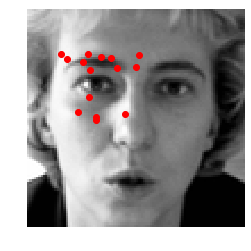

In [192]:
show(X_train[1], op[0][0][0])

In [76]:
y_train[1].shape

(30,)